In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sb
 
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [40]:
dataframe = pd.read_csv(r"dataset2.csv", decimal=",")
dataframe.head()

,Unnamed: 0,TEMPERATURA DO AR (°C),TEMPERATURA DO AR (°C).1,TEMPERATURA DO AR (°C).2,TEMPERATURA DO AR (°C).3,TEMPERATURA DO AR (°C).4,TEMPERATURA DO AR (°C).5,TEMPERATURA DO AR (°C).6,TEMPERATURA DO AR (°C).7,TEMPERATURA DO AR (°C).8,...,UMIDADE RELATIVA MINIMA DO AR (%).19,UMIDADE RELATIVA MINIMA DO AR (%).20,UMIDADE RELATIVA MINIMA DO AR (%).21,UMIDADE RELATIVA MINIMA DO AR (%).22,UMIDADE RELATIVA MINIMA DO AR (%).23,Unnamed: 145,Unnamed: 146,Unnamed: 147,Unnamed: 148,Unnamed: 149
0,HORA UTC,0.0,100.0,200.0,300.0,400.0,500.0,600.0,700.0,800.0,...,1900.0,2000.0,2100.0,2200.0,2300.0,,NaN,NaN,NaN,NaN
1,01-ene-2010,17.1,16.6,16.0,15.2,14.3,13.7,13.4,13.5,13.2,...,78.0,79.0,76.0,78.0,84.0,NaN,NaN,NaN,NaN,NaN
2,02-ene-2010,18.0,16.8,16.2,15.4,14.9,14.2,13.6,14.1,14.4,...,59.0,54.0,61.0,70.0,80.0,NaN,NaN,NaN,NaN,NaN
3,03-ene-2010,22.1,21.6,21.5,21.1,20.4,20.3,20.2,19.8,19.7,...,83.0,85.0,89.0,98.0,98.0,NaN,NaN,NaN,NaN,NaN
4,04-ene-2010,18.2,18.2,18.5,18.7,18.6,18.7,18.7,18.6,18.7,...,78.0,80.0,86.0,89.0,89.0,NaN,NaN,NaN,NaN,NaN


In [35]:
dataframe.describe()

,TEMPERATURA DO AR (°C),TEMPERATURA DO AR (°C).1,TEMPERATURA DO AR (°C).2,TEMPERATURA DO AR (°C).3,TEMPERATURA DO AR (°C).4,TEMPERATURA DO AR (°C).5,TEMPERATURA DO AR (°C).6,TEMPERATURA DO AR (°C).7,TEMPERATURA DO AR (°C).8,TEMPERATURA DO AR (°C).9,...,UMIDADE RELATIVA MINIMA DO AR (%).17,UMIDADE RELATIVA MINIMA DO AR (%).18,UMIDADE RELATIVA MINIMA DO AR (%).19,UMIDADE RELATIVA MINIMA DO AR (%).20,UMIDADE RELATIVA MINIMA DO AR (%).21,UMIDADE RELATIVA MINIMA DO AR (%).22,UMIDADE RELATIVA MINIMA DO AR (%).23,Unnamed: 146,Unnamed: 147,Unnamed: 148
count,1731.000000,1725.000000,1721.000000,1712.000000,1699.000000,1689.000000,1684.000000,1675.000000,1670.000000,1658.000000,...,1761.000000,1761.000000,1761.000000,1763.000000,1754.000000,1744.000000,1738.000000,0.0,0.0,0.0
mean,15.351473,15.063652,14.807902,14.615713,14.416068,14.225696,14.096912,13.990806,13.908862,13.889264,...,67.341851,66.331630,66.622374,68.573454,72.121437,77.979358,82.464327,NaN,NaN,NaN
std,3.759495,4.278407,5.847190,7.875265,10.111987,12.439502,14.802316,17.222625,19.647726,22.136355,...,42.879007,45.279048,47.521310,49.644978,51.689986,53.334186,55.004214,NaN,NaN,NaN
min,-1.600000,-2.200000,-2.000000,-3.000000,-3.800000,-3.200000,-3.000000,-3.200000,-3.400000,-3.900000,...,14.000000,16.000000,15.000000,15.000000,14.000000,25.000000,29.000000,NaN,NaN,NaN
25%,13.100000,12.800000,12.400000,12.200000,11.900000,11.600000,11.400000,11.200000,11.100000,10.900000,...,54.000000,52.000000,52.000000,54.500000,58.000000,66.000000,73.000000,NaN,NaN,NaN
50%,16.000000,15.600000,15.300000,15.000000,14.800000,14.600000,14.400000,14.200000,14.000000,14.000000,...,66.000000,65.000000,65.000000,68.000000,72.000000,80.000000,84.000000,NaN,NaN,NaN
75%,18.100000,17.800000,17.400000,17.200000,17.000000,16.800000,16.600000,16.500000,16.400000,16.300000,...,79.000000,79.000000,80.000000,83.000000,86.000000,90.000000,93.000000,NaN,NaN,NaN
max,25.700000,100.000000,200.000000,300.000000,400.000000,500.000000,600.000000,700.000000,800.000000,900.000000,...,1700.000000,1800.000000,1900.000000,2000.000000,2100.000000,2200.000000,2300.000000,NaN,NaN,NaN


In [57]:
dataframe.columns=[['dia','tempAire0','tempAire1','tempAire2','tempAire3','tempAire4','tempAire5','tempAire6','tempAire7','tempAire8','tempAire9','tempAire10','tempAire11','tempAire12','tempAire13','tempAire14','tempAire15','tempAire16','tempAire17','tempAire18','tempAire19','tempAire20','tempAire21','tempAire22','tempAire23','humAire0','humAire1','humAire2','humAire3','humAire4','humAire5','humAire6','humAire7','humAire8','humAire9','humAire10','humAire11','humAire12','humAire13','humAire14','humAire15','humAire16','humAire17','humAire18','humAire19','humAire20','humAire21','humAire22','humAire23','tempMaxAire0','tempMaxAire1','tempMaxAire2','tempMaxAire3','tempMaxAire4','tempMaxAire5','tempMaxAire6','tempMaxAire7','tempMaxAire8','tempMaxAire9','tempMaxAire10','tempMaxAire11','tempMaxAire12','tempMaxAire13','tempMaxAire14','tempMaxAire15','tempMaxAire16','tempMaxAire17','tempMaxAire18','tempMaxAire19','tempMaxAire20','tempMaxAire21','tempMaxAire22','tempMaxAire23','tempMinAire0','tempMinAire1','tempMinAire2','tempMinAire3','tempMinAire4','tempMinAire5','tempMinAire6','tempMinAire7','tempMinAire8','tempMinAire9','tempMinAire10','tempMinAire11','tempMinAire12','tempMinAire13','tempMinAire14','tempMinAire15','tempMinAire16','tempMinAire17','tempMinAire18','tempMinAire19','tempMinAire20','tempMinAire21','tempMinAire22','tempMinAire23','humMaxAire0','humMaxAire1','humMaxAire2','humMaxAire3','humMaxAire4','humMaxAire5','humMaxAire6','humMaxAire7','humMaxAire8','humMaxAire9','humMaxAire10','humMaxAire11','humMaxAire12','humMaxAire13','humMaxAire14','humMaxAire15','humMaxAire16','humMaxAire17','humMaxAire18','humMaxAire19','humMaxAire20','humMaxAire21','humMaxAire22','humMaxAire23','humMinAire0','humMinAire1','humMinAire2','humMinAire3','humMinAire4','humMinAire5','humMinAire6','humMinAire7','humMinAire8','humMinAire9','humMinAire10','humMinAire11','humMinAire12','humMinAire13','humMinAire14','humMinAire15','humMinAire17','humMinAire18','humMinAire19','humMinAire20','humMinAire21','humMinAire22','humMinAire23','filaVacia1','filaVacia2','filaVacia3','filaVacia4','filaVacia5','filaVacia6']]
dataframe.drop(index =0, inplace = True)
dataframe.head()

,dia,tempAire0,tempAire1,tempAire2,tempAire3,tempAire4,tempAire5,tempAire6,tempAire7,tempAire8,...,humMinAire20,humMinAire21,humMinAire22,humMinAire23,filaVacia1,filaVacia2,filaVacia3,filaVacia4,filaVacia5,filaVacia6
1,01-ene-2010,17.1,16.6,16.0,15.2,14.3,13.7,13.4,13.5,13.2,...,78.0,79.0,76.0,78.0,84.0,NaN,NaN,NaN,NaN,NaN
2,02-ene-2010,18.0,16.8,16.2,15.4,14.9,14.2,13.6,14.1,14.4,...,59.0,54.0,61.0,70.0,80.0,NaN,NaN,NaN,NaN,NaN
3,03-ene-2010,22.1,21.6,21.5,21.1,20.4,20.3,20.2,19.8,19.7,...,83.0,85.0,89.0,98.0,98.0,NaN,NaN,NaN,NaN,NaN
4,04-ene-2010,18.2,18.2,18.5,18.7,18.6,18.7,18.7,18.6,18.7,...,78.0,80.0,86.0,89.0,89.0,NaN,NaN,NaN,NaN,NaN
5,05-ene-2010,18.3,17.9,18.1,18.0,17.9,18.0,18.0,18.3,18.7,...,61.0,59.0,66.0,78.0,85.0,NaN,NaN,NaN,NaN,NaN


In [72]:
tempAire = dataframe[['tempAire0','tempAire1','tempAire2','tempAire3','tempAire4','tempAire5','tempAire6','tempAire7','tempAire8','tempAire9','tempAire10','tempAire11','tempAire12','tempAire13','tempAire14','tempAire15','tempAire16','tempAire17','tempAire18','tempAire19','tempAire20','tempAire21','tempAire22','tempAire23']]
humAire = dataframe[['humAire0','humAire1','humAire2','humAire3','humAire4','humAire5','humAire6','humAire7','humAire8','humAire9','humAire10','humAire11','humAire12','humAire13','humAire14','humAire15','humAire16','humAire17','humAire18','humAire19','humAire20','humAire21','humAire22','humAire23']]
tempMaxAire = dataframe[['tempMaxAire0','tempMaxAire1','tempMaxAire2','tempMaxAire3','tempMaxAire4','tempMaxAire5','tempMaxAire6','tempMaxAire7','tempMaxAire8','tempMaxAire9','tempMaxAire10','tempMaxAire11','tempMaxAire12','tempMaxAire13','tempMaxAire14','tempMaxAire15','tempMaxAire16','tempMaxAire17','tempMaxAire18','tempMaxAire19','tempMaxAire20','tempMaxAire21','tempMaxAire22','tempMaxAire23']]
tempMinAire = dataframe[['tempMinAire0','tempMinAire1','tempMinAire2','tempMinAire3','tempMinAire4','tempMinAire5','tempMinAire6','tempMinAire7','tempMinAire8','tempMinAire9','tempMinAire10','tempMinAire11','tempMinAire12','tempMinAire13','tempMinAire14','tempMinAire15','tempMinAire16','tempMinAire17','tempMinAire18','tempMinAire19','tempMinAire20','tempMinAire21','tempMinAire22','tempMinAire23']]
humMaxAire = dataframe[['humMaxAire0','humMaxAire1','humMaxAire2','humMaxAire3','humMaxAire4','humMaxAire5','humMaxAire6','humMaxAire7','humMaxAire8','humMaxAire9','humMaxAire10','humMaxAire11','humMaxAire12','humMaxAire13','humMaxAire14','humMaxAire15','humMaxAire16','humMaxAire17','humMaxAire18','humMaxAire19','humMaxAire20','humMaxAire21','humMaxAire22','humMaxAire23']]
humMinAire = dataframe[['humMinAire0','humMinAire1','humMinAire2','humMinAire3','humMinAire4','humMinAire5','humMinAire6','humMinAire7','humMinAire8','humMinAire9','humMinAire10','humMinAire11','humMinAire12','humMinAire13','humMinAire14','humMinAire15','humMinAire17','humMinAire18','humMinAire19','humMinAire20','humMinAire21','humMinAire22','humMinAire23']]


In [73]:
tempAire=tempAire.mean(axis=0)
tempAire=tempAire.to_frame()
tempAire.head()

,0
tempAire0,15.360347
tempAire1,15.014385
tempAire2,14.700233
tempAire3,14.448919
tempAire4,14.188987


In [64]:
type(tempAire)

pandas.core.series.Series

In [61]:
type(dataframe)

pandas.core.frame.DataFrame

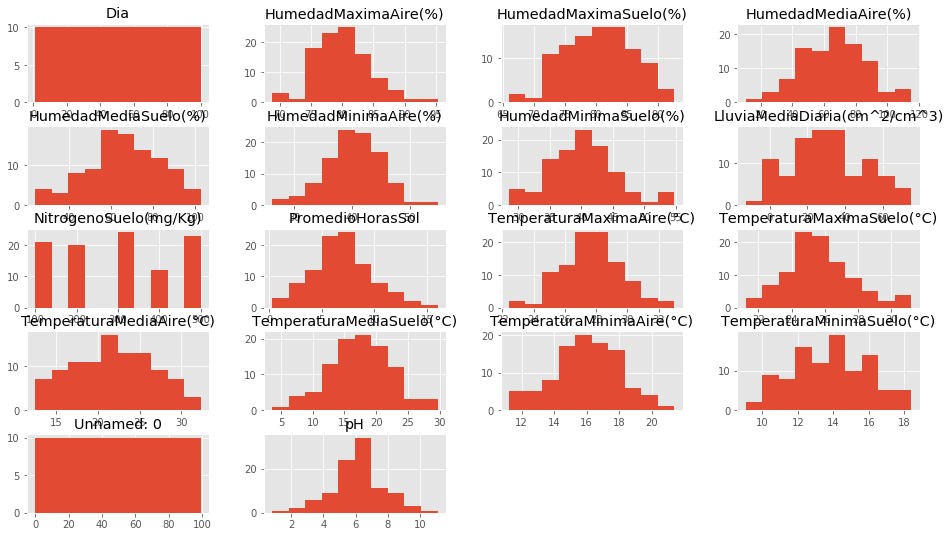

In [5]:
dataframe.hist()
plt.show()

In [6]:

dataframe["LluviaMediaDiaria(cm^2/cm^3)"]= dataframe["LluviaMediaDiaria(cm^2/cm^3)"].astype(int)
dataframe["HumedadMediaAire(%)"]= dataframe["HumedadMediaAire(%)"].astype(int)
dataframe["NitrogenoSuelo(mg/Kg)"]= dataframe["NitrogenoSuelo(mg/Kg)"].astype(int)


In [7]:
x = dataframe[['LluviaMediaDiaria(cm^2/cm^3)','HumedadMediaAire(%)']].values
y = dataframe['NitrogenoSuelo(mg/Kg)'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [8]:
#dataframe['LluviaMediaDiaria(cm^2/cm^3)']=int(dataframe['LluviaMediaDiaria(cm^2/cm^3)'])
print(dataframe['LluviaMediaDiaria(cm^2/cm^3)'])


0     54
1     17
2      1
3     15
4     32
      ..
95    55
96    20
97    26
98    38
99     1
Name: LluviaMediaDiaria(cm^2/cm^3), Length: 100, dtype: int64


In [9]:
dataframe.dtypes

Unnamed: 0                        int64
Dia                             float64
LluviaMediaDiaria(cm^2/cm^3)      int64
HumedadMediaAire(%)               int64
HumedadMinimaAire(%)            float64
HumedadMaximaAire(%)            float64
HumedadMediaSuelo(%)            float64
HumedadMinimaSuelo(%)           float64
HumedadMaximaSuelo(%)           float64
pH                              float64
PromedioHorasSol                float64
NitrogenoSuelo(mg/Kg)             int64
TemperaturaMediaAire(°C)        float64
TemperaturaMinimaAire(°C)       float64
TemperaturaMaximaAire(°C)       float64
TemperaturaMediaSuelo(°C)       float64
TemperaturaMinimaSuelo(°C)      float64
TemperaturaMaximaSuelo(°C)      float64
dtype: object

In [10]:
n_neighbors = 7
 
knn = KNeighborsClassifier(n_neighbors)
knn.fit(x_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(x_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(x_test, y_test)))

Accuracy of K-NN classifier on training set: 0.45
Accuracy of K-NN classifier on test set: 0.16


In [11]:

pred = knn.predict(x_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[1 0 1 0 1]
 [2 0 0 2 2]
 [1 1 2 1 3]
 [0 1 0 0 2]
 [2 1 1 0 1]]
              precision    recall  f1-score   support

         100       0.17      0.33      0.22         3
         200       0.00      0.00      0.00         6
         300       0.50      0.25      0.33         8
         400       0.00      0.00      0.00         3
         500       0.11      0.20      0.14         5

    accuracy                           0.16        25
   macro avg       0.16      0.16      0.14        25
weighted avg       0.20      0.16      0.16        25



In [ ]:
h = .02  # step size in the mesh
 
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#ffcc99', '#ffffb3','#b3ffff','#c2f0c2'])
cmap_bold = ListedColormap(['#FF0000', '#ff9933','#FFFF00','#00ffff','#00FF00'])
 
# we create an instance of Neighbours Classifier and fit the data.
clf = KNeighborsClassifier(n_neighbors, weights='distance')
clf.fit(x, y)
 
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
 
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
 
# Plot also the training points
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
    
patch0 = mpatches.Patch(color='#FF0000', label='1')
patch1 = mpatches.Patch(color='#ff9933', label='2')
patch2 = mpatches.Patch(color='#FFFF00', label='3')
patch3 = mpatches.Patch(color='#00ffff', label='4')
patch4 = mpatches.Patch(color='#00FF00', label='5')
plt.legend(handles=[patch0, patch1, patch2, patch3,patch4])
 
    
plt.title("5-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))
 
plt.show()